### Fake news detection using Machine Learning Algorithm

#### This Project is to solve the problem with fake news. In this we have used two datasets named "Fake" and "True" from Kaggle. You can download the file from here https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset I have used two classifiers in this project they are, Decision Tree, Logistic Regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asdw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
"""printing the stopword (stopwords is the word whicvh will not affect the result i.e ( if this words
are there in news then this word cant detect if the news is fake or not) """
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
# importing the fake data
fake=pd.read_csv( 'C:/Users/asdw/Documents/Fake.csv',sep=',')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# importing the true data set
true=pd.read_csv( 'C:/Users/asdw/Documents/True.csv',sep=',')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
# Add flag to track fake(1) and real(0)
fake['target'] = '1'
true['target'] = '0'

In [7]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [8]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [9]:
array=np.array(data['target'])
print(np.unique(array))

['0' '1']


In [10]:
data.describe()

,title,text,subject,date,target
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",1
freq,14,627,11272,182,23481


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [12]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [13]:
data.shape

(44898, 5)

In [14]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [15]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,"U.S. Air Force awards contracts to Boeing, Nor...",(Reuters) - The U.S. Air Force has awarded Boe...,politicsNews,0
1,House of Representatives reignites gun-control...,WASHINGTON (Reuters) - The Republican-controll...,politicsNews,0
2,WATCH: GEORGE W. BUSH Offers Somber Memorial H...,These two Presidents could not be more differe...,left-news,1
3,EXTORTION? HOW IRAN Used Nuke Deal To Force Ob...,If I were a European and was forced to deal wi...,left-news,1
4,OBAMA MAKES STUNNING 11th Hour Gift Of Massive...,In what amounts to an 11th hour gift by the ...,Government News,1


In [16]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,(Reuters) - The U.S. Air Force has awarded Boe...,politicsNews,0
1,WASHINGTON (Reuters) - The Republican-controll...,politicsNews,0
2,These two Presidents could not be more differe...,left-news,1
3,If I were a European and was forced to deal wi...,left-news,1
4,In what amounts to an 11th hour gift by the ...,Government News,1


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


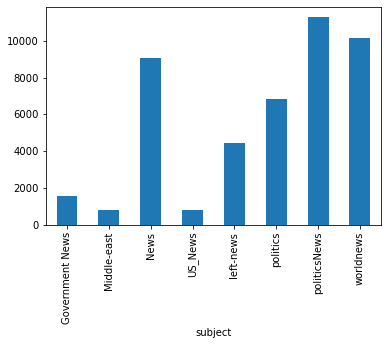

In [17]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

#### political news articles have highest counts(>1000) followed by world news(1000)

target
0    21417
1    23481
Name: text, dtype: int64


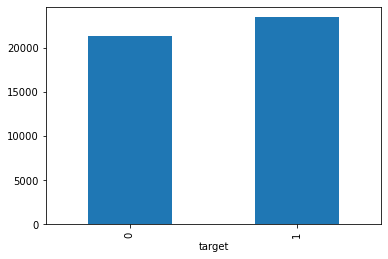

In [18]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

#### In this data set fake news are more then the real news

In [19]:
data.drop(["subject"],axis=1,inplace=True)
data.head()

,text,target
0,(Reuters) - The U.S. Air Force has awarded Boe...,0
1,WASHINGTON (Reuters) - The Republican-controll...,0
2,These two Presidents could not be more differe...,1
3,If I were a European and was forced to deal wi...,1
4,In what amounts to an 11th hour gift by the ...,1


In [20]:
data.isnull().sum()

text      0
target    0
dtype: int64

In [21]:
#training the data set
x=data["text"]
y=data["target"]

In [22]:
x_train, x_test,y_train, y_test=train_test_split(x,y, test_size=0.2)
                                                          
                                                        

#### TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

#### TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator. vocabulary_ Is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index.  In each vector the numbers (weights) represent features tf-idf score.


In [23]:
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)


### Logistic regression

In [24]:
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [25]:
LR.score(xv_test,y_test)

0.9870824053452116

In [26]:
pred_LR=LR.predict(xv_test)

In [27]:
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4216
           1       0.99      0.99      0.99      4764

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [29]:
DT.score(xv_test,y_test)

0.9961024498886414

In [30]:
pred_DT=DT.predict(xv_test)

In [31]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4216
           1       1.00      1.00      1.00      4764

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



#####  Decision tree model has the better accuracy than Logistic regression